# 다중 회귀(multiple regression)

여러 개의 특성을 사용한 선형 회귀.(특성이 2개면 선형 회귀는 평면을 학습한다.)

$y = ax_1 + bx_2 + c$

$y = ax + bz + c$

$y = ax_1 + bx_2 + cx_3 + d$ (4차원)...

학습 변수가 늘어난다. = 더욱 풍족해진다. = 모델이 복잡해진다. = 똑똑해진다.

특성 공학(feature engineering) : 기존의 특성을 사용하여 새로운 특성을 뽑아내는 작업.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://bit.ly/perch_csv_data')

perch_full = df.to_numpy()                                                         # 불러온 정보는 numpy로 변환, numpy로 변환시키면서 인덱스와 헤드(컬럼)를 가져오지 않는다, 즉, 그냥 df를 불러오면 컬럼이 나온다.
print(perch_full)                                                                  # 자료는 길이, 높이, 두께로 총 3개의 특성이 들어있다.

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
print(perch_full.shape)                                                             # 자료를 가져와서 numpy로 만들었으면 *shape*으로 확인은 필수*

(56, 3)


# [넘파이 튜토리얼](http://ml-ko.kr/homl2/tools_numpy.html)



# [판다스 튜토리얼](http://ml-ko.kr/homl2/tools_pandas.html)

# 다항 특성 만들기

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공. 사이킷런에서는 이런 클래스를 **변환기(transforme)** 이라고 부른다.

In [ ]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split                                # input에는 길이, 높이, 두께의 3가지 특성, target에는 무게 특성이 들어가 있다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

# PolynomialFeatures 사용하기(특성 공학의 예시)

특성의 제곱과 특성끼리 곱한 항이 추가(기존의 있던 특성에서 특성의 수가 증가) 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()

poly.fit([[2, 3]])                                                                  # fit을 해줘야만 변환(transform)이 가능.
print(poly.transform([[2, 3]]))                                                     # poly.transform을 이용하여 기존 2개였던 특성을 6개로 늘림.

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
poly.get_feature_names_out()                                                        # 특성을 늘린 프로세서를 확인.

array(['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [ ]:
poly = PolynomialFeatures(include_bias=False)                                       # 여기서 include_bias=False 는 늘려놓은 특성 중 첫번째 특성인 1을 없애주는 역할

poly.fit(train_input)                                                               # input에 있던 길이, 높이, 두께 특성을 늘린다.(특성을 제곱, 특성끼리 곱하기)
train_poly = poly.transform(train_input)
print(train_poly.shape)                                                             # 특성을 조절한 다음에는 shape 사용이 필수. 현재 (42, 9)의 형태로 3개였던 특성이 9개로 늘었다. -> '_poly'에 넣음

(42, 9)


In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)                                              # test 세트도 똑같이 특성을 늘려 훈련을 할 수 있는 상태로 만든다.
print(test_poly)                                                                   # 훈련 세트의 설정을 바꿨다면, test 세트의 설정도 훈련 세트와 똑같이 만들어주는 습관을 들여야한다.

[[8.400000e+00 2.110000e+00 1.410000e+00 7.056000e+01 1.772400e+01
  1.184400e+01 4.452100e+00 2.975100e+00 1.988100e+00]
 [1.800000e+01 5.220000e+00 3.320000e+00 3.240000e+02 9.396000e+01
  5.976000e+01 2.724840e+01 1.733040e+01 1.102240e+01]
 [2.750000e+01 7.280000e+00 4.570000e+00 7.562500e+02 2.002000e+02
  1.256750e+02 5.299840e+01 3.326960e+01 2.088490e+01]
 [2.130000e+01 6.380000e+00 3.530000e+00 4.536900e+02 1.358940e+02
  7.518900e+01 4.070440e+01 2.252140e+01 1.246090e+01]
 [2.250000e+01 5.860000e+00 3.620000e+00 5.062500e+02 1.318500e+02
  8.145000e+01 3.433960e+01 2.121320e+01 1.310440e+01]
 [4.000000e+01 1.114000e+01 6.630000e+00 1.600000e+03 4.456000e+02
  2.652000e+02 1.240996e+02 7.385820e+01 4.395690e+01]
 [3.000000e+01 7.620000e+00 4.770000e+00 9.000000e+02 2.286000e+02
  1.431000e+02 5.806440e+01 3.634740e+01 2.275290e+01]
 [2.460000e+01 6.730000e+00 4.170000e+00 6.051600e+02 1.655580e+02
  1.025820e+02 4.529290e+01 2.806410e+01 1.738890e+01]
 [3.900000e+01 1.114000e

# 다중 회귀 모델 훈련(LinearRegressoin 사용)

여러 개의 특성을 활용하여 훈련을 하는 것도 기존의 선형 회귀 훈련에서 사용하던 **LinearRegression**을 사용한다.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)                                                   # 현재 train_poly는 9개의 특성을 가지고 있다.
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594134


이처럼 길이만 사용하여 농어의 무게를 예측했을 때 보였던 과소적합 문제가 해결되었다.

그렇다면 이것보다 훨씬 고차항의 모델을 만들면 어떨까?

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)                             # PolynomialFeatures에서 degree는 차원(x^ 의 차수, 만약, degree=3 일 경우 a 특성의 최대 차수는 a^3이 된다.)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape, test_poly.shape)                                            # degree를 늘린 후, shape을 확인하니 특성의 개수가 55개로 훨씬 더 많이 증가함을 알 수 있다. 이는 더 복잡한 모델을 뜻한다.

(42, 55) (14, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [ ]:
print(lr.score(test_poly, test_target))                                              # 하지만 너무 과도한 특성은 훈련 세트를 미친듯이 강화시켜 과대적합을 이끌어낸다.

-144.40579242684848


이처럼 특성이 많을수록 정확한 예측을 할 수 있지만, 과대적합이라는 현상이 따라온다. 다시 말해, 훈련 세트에 사용하는 샘플 개수가 특성의 개수보다 적으면 훈련은 완벽하게 시킬 수 있지만 문제는 풀지 못한다는 말이다.

이와 같은 현상을 해결하기 위해서 사용하는 방안이 **규제(regularization)**이다.

# 규제

머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방을 하는 것. 즉, 과대적합을 없애는 방법이다.

그것을 위해 규제는 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 작업이다.

규제에는 제곱을 이용하는 **릿지 회귀(Ridge)**와 절댓값을 이용하는 **라쏘 회귀(Lasso)**가 있다.

In [ ]:
# ridge = l2(level2)
# lasso = l1(level1)

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 특성 스케일(StandardScaler 사용하기)

규제(Ridge, Lasso)는 계수 값을 조절하는 방식으로 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 않느다. 즉 **정규화**를 해야 한다는 말이다.

**StandardScaler**라는 변환기를 사용한다면 평균과 표준편차를 직접 구하지 않고도 정규화를 사용할 수 있다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()                                                               # 객체화를 실행한다.
ss.fit(train_poly)                                                                  # 객체화를 실행했으니 아직 정화되지 않은 자료의 정규화를 진행한다. -> '_scaled' 에 넣음
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지 회귀(Ridge)

계수의 제곱값을 사용한 규제를 통해 더 나은 정보를 예측한다.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()                                                                      # 객체화를 실행한다.
ridge.fit(train_scaled, train_target)                                                # 객체화를 실행하였으니 정규화된 특성을 가지고 훈련을 시작한다.
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


# Ridge에서 최적 alpha 값 찾기

alpha 값은 ridge 모델이 학습하는 것이 아니라 사전에 우리가 지정해야하는 값이다. 이렇게 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 **하이퍼파라미터(hyperparameter)**라고 부른다.

ridge에서는 alpha 값이 클수록 규제가 세진다.

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]                                         # ridge 모델이 받을 수 있는 값, ridge는 제곱수를 가지고 계산

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)                                                      # Ridge는 alpha를 매개변수로 규제의 강도를 조절. alpha의 디폴트 값은 1.
    ridge.fit(train_scaled, train_target)

    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

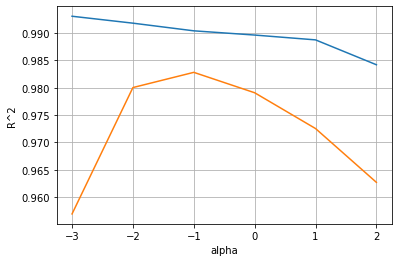

In [ ]:
plt.plot(np.log10(alpha_list), train_score, color='blue')                          # alpha를 그대로 그래프에 그리면 간격이 너무 촘촘하므로 log로 바뀌 간격을 조절
plt.plot(np.log10(alpha_list), test_score, color='orange')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()                                                                         # 그래프를 보면 훈련값과 테스트값의 오차가 가장 작은 곳은 -1, log함수라는 사실을 감안했을 때, alpha의 값은 0.1이 된다.

In [ ]:
ridge = Ridge(alpha=0.1)                                                            # 그래프에서 찾은 최적의 alpha 값을 Ridge에 대입한다.
ridge.fit(train_scaled, train_target)        
print(ridge.score(train_scaled, train_target))                                      # 디폴트 된 alpha 값을 사용한 것보다 더욱 깔끔하게 예측이 가능하다.
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


In [ ]:
print(ridge.coef_)

[ 27.61933479  -1.64022156 -19.73256036  30.0306195   16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]


# 라쏘 회귀(Lasso)

계수의 절댓값을 사용한 규제를 통해 더 나은 정보를 예측한다. 다만, Ridge와 달리 0의 값을 가질 수 있다.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()                                                                    # 객체화를 실행한다.

lasso.fit(train_scaled, train_target)                                              # 객체화를 실행했으니 정규환된 특성을 가지고 훈련을 시작한다.
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


# Lasso에서 최적 alpha 값 찾기

alpha 값은 lasso 모델이 학습하는 것이 아니라 사전에 우리가 지정해야하는 값이다. 이렇게 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 **하이퍼파라미터(hyperparameter)**라고 부른다.

lasso에서는 alpha 값이 클수록 0이 되는 값이 늘어난다.

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)                                     # max_iter=n : n번 반복하여 lasso 모델의 최적의 계수를 찾아라. lasso는 여러 번 반복하여 훈련하는 것으로 훈련의 획수가 적을 수 있다는 경고문이 나온다.
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


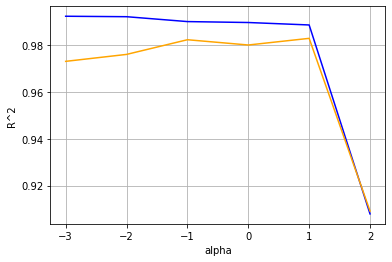

In [ ]:
plt.plot(np.log10(alpha_list), train_score, color='blue')
plt.plot(np.log10(alpha_list), test_score, color='orange')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()                                                                         # 그래프를 보면 훈련값과 테스트값의 오차가 가장 작은 곳은 1, log함수라는 사실을 감안했을 때, alpha의 값은 10이 된다.

In [ ]:
lasso = Lasso(alpha=10)                                                            # 그래프에서 찾은 최적의 alpha 값을 Lasso에 대입한다.
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))                                     # 디폴트 된 alpha 값을 사용한 것보다 더욱 깔끔하게 예측이 가능하다.
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))                                                    # lasso를 사용한 특성의 40개의 계수(기울기)가 0이 나왔다. 즉, 위 그래프는 총 55개의 특성 중 15개의 특성만을 가지고 계산을 진행했다.(차원축소)

40


In [ ]:
print(lasso.coef_)                                                                 # 설명을 더 하자면 0으로 나온 특성들은 굳이 데이터 예측에 필요 없는 부분이라고 생각해도 좋다.

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
